<a href="https://colab.research.google.com/github/manthandas/airbnb-bookings-analysis-EDA-project/blob/main/airbnb_project(PersonalisedResults).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')   # to filter and suppress warning messages, it disables the display of warning messages issued by other parts of the code. The purpose of doing this is to prevent warning messages from cluttering the console or logs.

# to render Matplotlib plots as static images directly within the notebook itself
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the dataset

airbnb_df = pd.read_csv('/content/drive/MyDrive/AlmaBetter Project/Airbnb NYC 2019.csv')
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [ ]:
airbnb_df.head().T

,0,1,2,3,4
id,2539,2595,3647,3831,5022
name,Clean & quiet apt home by the park,Skylit Midtown Castle,THE VILLAGE OF HARLEM....NEW YORK !,Cozy Entire Floor of Brownstone,Entire Apt: Spacious Studio/Loft by central park
host_id,2787,2845,4632,4869,7192
host_name,John,Jennifer,Elisabeth,LisaRoxanne,Laura
neighbourhood_group,Brooklyn,Manhattan,Manhattan,Brooklyn,Manhattan
neighbourhood,Kensington,Midtown,Harlem,Clinton Hill,East Harlem
latitude,40.64749,40.75362,40.80902,40.68514,40.79851
longitude,-73.97237,-73.98377,-73.9419,-73.95976,-73.94399
room_type,Private room,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,149,225,150,89,80


In [ ]:
# Renaming few columns for better understanding

rename_column = {'id':'listing_id', 'name':'listing_name', 'number_of_reviews':'total_reviews', 'calculated_host_listings_count':'host_listings_count'}

In [ ]:
# Renaming the current function

airbnb_df = airbnb_df.rename(columns = rename_column)
airbnb_df.head(10)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
# Shape of the dataset

airbnb_df.shape

(48895, 16)

In [ ]:
# Basic information of the dataset

airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [ ]:
# Checking for duplicate rows

airbnb_df = airbnb_df.drop_duplicates()
airbnb_df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [ ]:
# Filling the null values of the columns with some substitute values

airbnb_df['listing_name'].fillna('unknown', inplace = True)
airbnb_df['host_name'].fillna('no_name', inplace = True)

In [ ]:
# All the null values are removed

airbnb_df[['host_name', 'listing_name']].isnull().sum()

host_name       0
listing_name    0
dtype: int64

In [ ]:
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].replace(to_replace = np.nan, value = 0).astype('int64')
airbnb_df['reviews_per_month'].isnull().sum()   # Null values are replaced by 0

0

In [ ]:
# Dataset columns are changed; Null values are replaced with substitute values and last_review column has been removed.

airbnb_df.sample(10)

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
1014,412061,Brownstone Sunny & Spacious top fl,2051075,Linda,Brooklyn,Crown Heights,40.67259,-73.95489,Entire home/apt,125,30,58,2019-06-01,0,2,212
3213,1918903,Private 2 BR APT: Free WIFI & JACUZZI,5243122,R,Brooklyn,Bedford-Stuyvesant,40.67963,-73.93750,Entire home/apt,140,3,156,2019-04-25,2,2,230
21774,17509152,PRIVATE BATHROOM ! PRIME LOCATION,118378908,Jose,Brooklyn,Williamsburg,40.71410,-73.95064,Private room,70,28,28,2019-06-01,1,6,303
35079,27812071,Cozy Room East Williamsburg (15 Min to Manhattan),210019212,Holden,Brooklyn,Bushwick,40.70767,-73.92307,Private room,49,7,28,2019-06-25,2,3,28
4610,3220178,Artist's home near park and trains,16307118,Dov,Brooklyn,Prospect-Lefferts Gardens,40.65684,-73.95719,Private room,55,1,47,2019-06-22,0,1,249
9469,7264263,Beautiful classic NYC studio,5030772,Jessica,Manhattan,Upper East Side,40.77258,-73.95213,Entire home/apt,120,1,13,2016-12-27,0,1,0
1275,548133,Chic One-Bedroom Apt,2694451,Shontae,Brooklyn,Clinton Hill,40.69073,-73.96762,Entire home/apt,135,3,28,2019-06-01,0,1,211
28882,22270195,LIC Private 1 Bdrm 10 mins away Manhattan NYC,162745077,Dorothy,Queens,Long Island City,40.75447,-73.92887,Private room,150,2,17,2019-06-22,0,2,72
27077,21423426,Peaceful 1 Bedroom in the East Village,10391716,Sasha,Manhattan,East Village,40.72171,-73.98307,Entire home/apt,190,4,68,2019-06-24,3,1,41
27139,21461615,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,145285876,Hiro,Brooklyn,Williamsburg,40.71523,-73.96245,Private room,66,2,3,2017-12-10,0,2,0


In [ ]:
# Describing the dataframe

airbnb_df.describe()

,listing_id,host_id,latitude,longitude,price,minimum_nights,total_reviews,reviews_per_month,host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.806258,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.502767,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.000000,327.000000,365.000000


# Q1. What is the distribution of price range in Airbnb Bookings {using histogram}

---

In [ ]:
# Finding big outliers in important columns first

def iqr_technique(DFcolumn):  # Outlier function for removing outliers in important columns
  Q1 = np.percentile(DFcolumn, 25)
  Q3 = np.percentile(DFcolumn, 75)
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)

  return lower_range, upper_range

In [ ]:
lower_bound, upper_bound = iqr_technique(airbnb_df['price'])
airbnb_df = airbnb_df[(airbnb_df.price > lower_bound) & (airbnb_df.price < upper_bound)]

# Outliers are removed from the price column and the maximum price has been displayed

print(airbnb_df['price'].max())

333


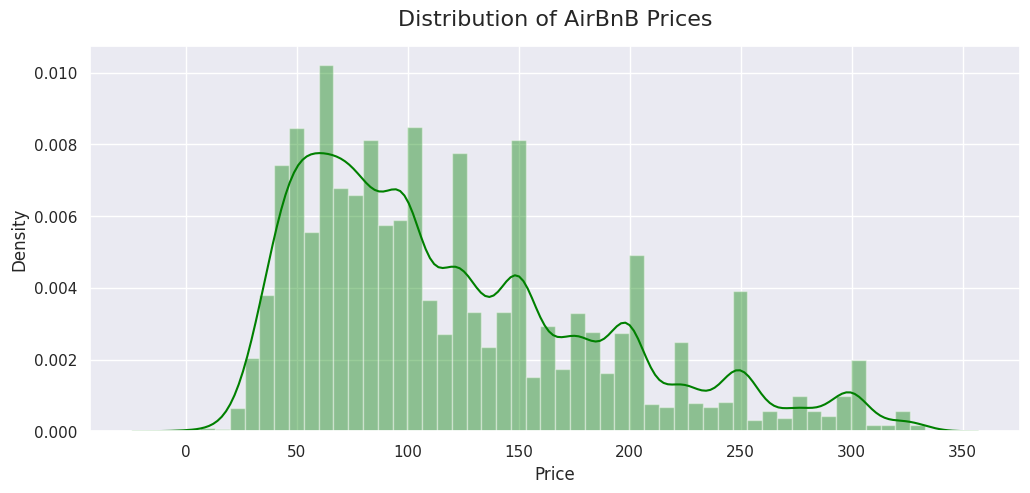

In [ ]:
mpl.figure(figsize = (12, 5))

sb.set_theme(style = 'darkgrid')   # Setting the seaborn theme as darkgrid

sb.distplot(airbnb_df['price'], color = ('#008000'))    # Creating a histogram of the 'price' column of the Airbnb_df dataframe using sns.distplot() and specifying the color as green

# Adding labels to the x-axis and y-axis
mpl.xlabel('Price', fontsize = 12)
mpl.ylabel('Density', fontsize = 12)

mpl.title('Distribution of AirBnB Prices', fontsize = 16, pad = 15)    # Adding a title to the plot

mpl.show() # Display the plots

**Observations -**

---

**Reason -**

Histograms are visually appealing and effective in presenting numerical data distributions, aiding in easy comparison across various factors like location or time.

**Insights -**

i. The price range for accommodations on Airbnb looks to be between 20 and 330 dollars, with the majority of listings lying between 50 and 150 dollars.

ii. The price distribution seems to peak in the 50 to 150 dollar range, with listings in higher and lower price ranges having a somewhat lower density.

iii. Since the quantity of postings decreases dramatically in this price range, there can be fewer listings available at costs higher than 250 dollars.

**Business Impact -**

By recognizing the peak price range and the decreasing quantity of listings at higher prices, businesses can strategically position their offerings within the popular price range of 50 to 150 dollars, ensuring competitive market positioning and potentially higher customer demand.

# Q2. What are the Number of Hosts per location {using line chart}

---



In [ ]:
HostsPerLoc = airbnb_df.groupby('neighbourhood_group')['listing_id'].count().reset_index()   # Creating a new DF that displays the no. of hosts in each neighborhood group in the dataset

HostsPerLoc.columns = ['Neighbourhood_Groups', 'Host_counts']    # Renaming the columns of the resulting DF to 'Neighbourhood_Groups' and 'Host_counts'

HostsPerLoc

,Neighbourhood_Groups,Host_counts
0,Bronx,1070
1,Brooklyn,19415
2,Manhattan,19501
3,Queens,5567
4,Staten Island,365


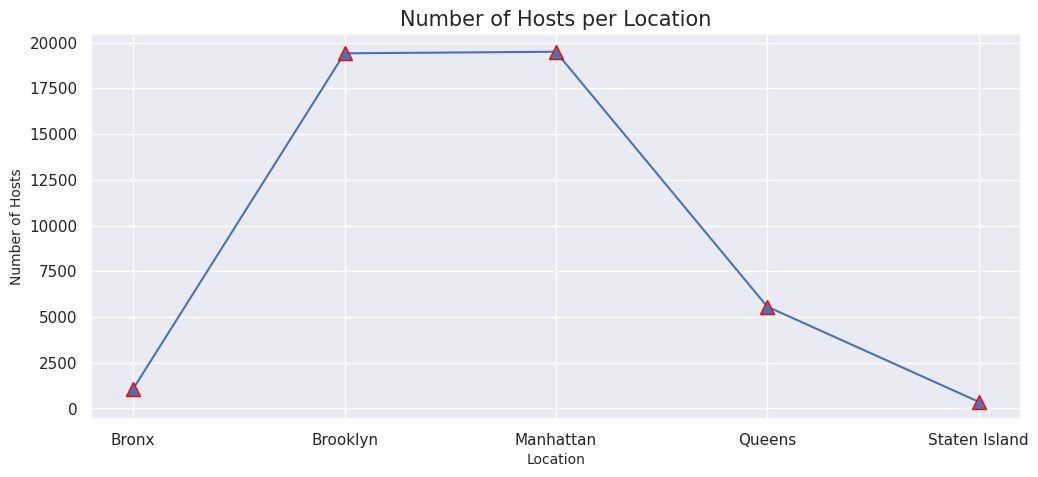

In [ ]:
HostsPerLoc = airbnb_df['listing_id'].groupby(airbnb_df['neighbourhood_group']).count()    # Grouped the data by neighbourhood_group and count the no. of listings for each group

locations = HostsPerLoc.index    # List of neighbourhood_group names
host_counts = HostsPerLoc.values    # List of host counts for each neighbourhood_group

mpl.figure(figsize = (12, 5))
mpl.plot(locations, host_counts, marker = '^', markersize = 10, markeredgewidth = 1, markeredgecolor = '#ff0000', linestyle = '-')    # Creating the line chart using marker function

# Add title and labels
mpl.title('Number of Hosts per Location', fontsize = 15)
mpl.xlabel('Location', fontsize = 10)
mpl.ylabel('Number of Hosts', fontsize = 10)

mpl.show()

**Observations -**

---

**Reason -**

Line charts are great for displaying data in a sequential order, like geographical locations, making it simple to observe patterns and connections between data points.

**Insights -**

i. With 19501, Manhattan has the most hosts, followed by Brooklyn with 19415, who has the second-most hosts.

ii. Staten Island has the fewest residents, with only 365, followed by Queens with 5567 and the Bronx with 1070.

iii. With more than twice as many hosts in Queens and more than 18 times as many hosts in the Bronx, Brooklyn and Manhattan have the most hosts.

**Business Impact -**

Understanding the geographical distribution of hosts across the different boroughs can inform targeted marketing strategies to capitalize on high host density areas, thereby maximizing market penetration and potential revenue.

# Q3. What is the average price of each Neighborhood Group {using lineplot(a) and barplot(b)}

---



In [ ]:
grouped = airbnb_df.groupby("neighbourhood_group").mean()   # Grouping the dataset by neighborhood group and calculating the mean of each group

avg_price_of_neighbourhood_group = grouped.reset_index()   # Resetting the index of the grouped DF so that the neighborhood group becomes a column

avg_price_of_neighbourhood_group = round(avg_price_of_neighbourhood_group.rename(columns = {"price": "avg_price"}), 2)   # Renaming (price --> avg_price) column

avg_price_of_neighbourhood_group[['neighbourhood_group', 'avg_price']].head()    # Selected only 'neighbourhood_group' and 'avg_price' column

,neighbourhood_group,avg_price
0,Bronx,77.37
1,Brooklyn,105.70
2,Manhattan,145.90
3,Queens,88.90
4,Staten Island,89.24


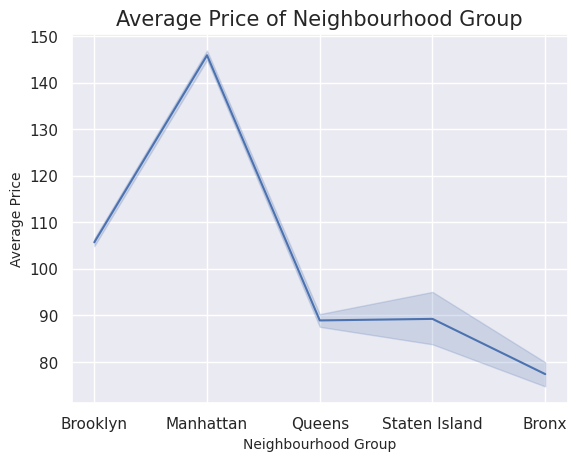

In [ ]:
# 3(a). lineplot graph for avg price of neighbourhood group

sb.lineplot(x = 'neighbourhood_group', y = 'price', data = airbnb_df, estimator = np.mean)  # Creating the line chart

# Adding axis labels and title
mpl.xlabel('Neighbourhood Group', fontsize = 10)
mpl.ylabel('Average Price', fontsize = 10)
mpl.title('Average Price of Neighbourhood Group', fontsize = 15)
mpl.show()

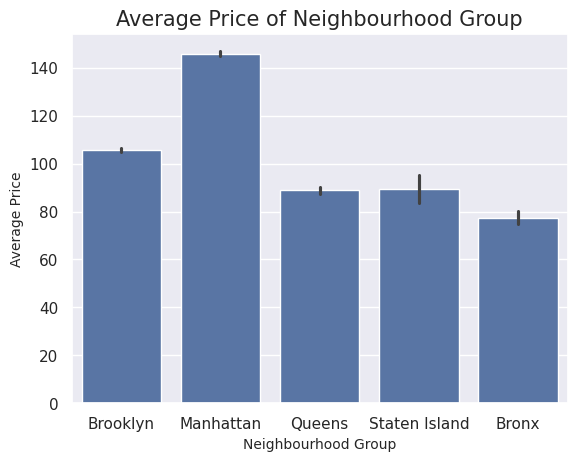

In [ ]:
# 3(b). barplot graph for avg price of neighbourhood group

sb.barplot(x = 'neighbourhood_group', y = 'price', data = airbnb_df, estimator = np.mean)  # The above line chart in bar plot

# Adding axis labels and title
mpl.xlabel('Neighbourhood Group', fontsize = 10)
mpl.ylabel('Average Price', fontsize = 10)
mpl.title('Average Price of Neighbourhood Group', fontsize = 15)
mpl.show()

**Observations -**

---

**Reason -**

A line plot could be a good choice for illustrating trends and changes over time in the average price of neighborhood groups, allowing for the visualization of price fluctuations and identifying any seasonal patterns or long-term trends.

On the other hand, a bar plot might be suitable for comparing the average prices of different neighborhood groups directly, enabling a clear and straightforward comparison of pricing levels across various locations without emphasizing the temporal aspect.


**Insights -**

i. Manhattan has the highest average listing price at 146 dollars/day, while the Bronx has the lowest at approximately 77 dollars/day.

ii. In the second graph, there is a significant price distribution in Manhattan and Brooklyn, with Manhattan showing more price variety.

iii. The average price tends to increase as you move from the outer boroughs (Bronx, Brooklyn, Queens, Staten Island) towards the city center (Manhattan).

iv. Queens and Staten Island have relatively similar average prices, despite their different locations within the city.

v. The data suggests that living costs are higher in the central Manhattan area compared to the outer boroughs due to higher demand in Manhattan's densely populated and commercially important neighborhoods.

**Business Impact -**


Understanding the price distribution and trends across different neighborhood groups enables strategic investment decisions, with potential implications for marketing strategies and resource allocation aimed at maximizing profitability and market competitiveness.

# Q4. What are the top 10 Neighborhoods as per listing/property {using bar plot}

---



In [ ]:
TopNeighbourhoods = airbnb_df['neighbourhood'].value_counts()[:10].reset_index()    # Creating a DF that displays the top 10 neighborhoods in the dataset based on the no. of listings in each neighborhood

TopNeighbourhoods.columns = ['Top_Neighborhoods', 'Listing_Counts']   # Renaming the columns of the resulting DF to 'Top_Neighborhoods' and 'Listing_Counts'

TopNeighbourhoods

,Top_Neighborhoods,Listing_Counts
0,Williamsburg,3732
1,Bedford-Stuyvesant,3638
2,Harlem,2585
3,Bushwick,2438
4,Upper West Side,1788
5,Hell's Kitchen,1731
6,East Village,1714
7,Upper East Side,1670
8,Crown Heights,1519
9,Midtown,1143


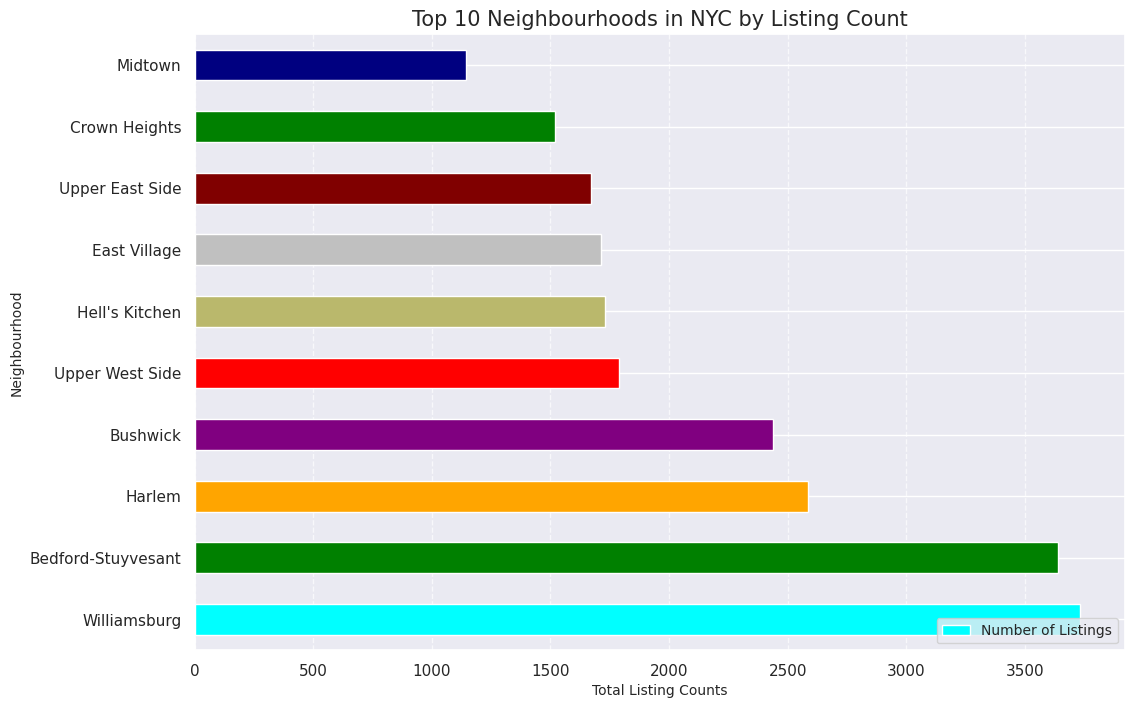

In [ ]:
Top10_Neighbourhoods = airbnb_df['neighbourhood'].value_counts().nlargest(10)   # To get the top 10 neighborhoods by listing count

colors = ['#00FFFF', '#008000', '#FFA500', '#800080', '#ff0000', '#BAB86C', '#C0C0C0', '#800000', '#008000', '#000080']

Top10_Neighbourhoods.plot(kind = 'barh', figsize = (12, 8), color = colors)   # Creating a horizontal bar plot of the top 10 neighborhoods

# Adding labels to the x-axis and y-axis
mpl.xlabel('Total Listing Counts', fontsize = 10)
mpl.ylabel('Neighbourhood', fontsize = 10)

# Adding title and adjusting font size
mpl.title('Top 10 Neighbourhoods in NYC by Listing Count', fontsize = 15)

# Adding a grid and a legend
mpl.grid(axis = 'x', linestyle = '--', alpha = 0.7)
mpl.legend(['Number of Listings'], loc = 'lower right', fontsize = 10)

mpl.show()

**Observations -**

---

**Reason -**

Bar plots offer a crisp visual ranking of neighborhoods by listing numbers, ensuring efficient use of space when comparing multiple categories.

**Insights -**

i. Top neighborhoods in NYC by listing count: Williamsburg, Bedford-Stuyvesant, Harlem, Bushwick, and the Upper West Side.

ii. These neighborhoods are predominantly situated in Brooklyn and Manhattan.

iii. Higher population and housing demand in these boroughs could explain their high listing counts.

iv. It's important to note that listing count alone may not fully reflect overall housing demand, as factors like cost of living and housing availability also influence the picture.

**Business Impact -**

Identifying the top-performing neighborhoods by listing count in NYC can inform strategic business decisions, including targeted marketing campaigns, resource allocation, and potential expansion plans to capitalize on high-demand areas for increased market competitiveness and profitability.